### **Method 2:** Music Genre prediction based on the Mental Health and Songs recommendations for the improvement

In [ ]:
# Mounting Google drive
import os
from google.colab import drive
drive.mount('/content/drive')

# Change current working directory to My Drive
# os.chdir('/content/drive/My Drive')

MessageError: ignored

**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

**Loading datasets**

In [ ]:
songs = pd.read_
 ('/content/drive/My Drive/Colab Notebooks/DATA240/final_songs.csv')
songs.head()

,Song,Artist,Genre
0,Symphony No. 5,Ludwig van Beethoven,Classical
1,Eine Kleine Nachtmusik,Mozart,Classical
2,Canon in D,Pachelbel,Classical
3,Moonlight Sonata,Ludwig van Beethoven,Classical
4,Ode to Joy,Beethoven,Classical


In [ ]:
# Displaying unique values for songs genre
print("Music Genre: ", songs['Genre'].unique())
print('Total number of music genre: ',len(songs['Genre'].unique()))

Music Genre:  ['Classical' 'Country' 'EDM' 'Folk' 'Gospel' 'Hip hop' 'Jazz' 'K pop'
 'Latin' 'Video game music' 'Rock' 'Rap' 'R&B' 'Pop' 'Lofi' 'Metal']
Total number of music genre:  16


In [ ]:
# Survey data
survey = pd.read_excel('/content/drive/My Drive/Colab Notebooks/DATA240/generated_mxmh_survey.xlsx')
survey.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,2022-08-27 19:29:00,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand
1,2022-08-27 19:57:00,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand
2,2022-08-27 21:28:00,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand
3,2022-08-27 21:40:00,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand
4,2022-08-27 21:54:00,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand


### **Data Cleaning**

In [ ]:
survey.shape

(2736, 33)

In [ ]:
# Dropping the unnecessary columns
survey.drop(columns=['Timestamp','Exploratory','Foreign languages','Age', 'Primary streaming service', 'Hours per day','While working','Instrumentalist','Composer', 'BPM','Permissions'], inplace=True)
survey.shape

(2736, 22)

In [ ]:
survey.head()

,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,Latin,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,Rock,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,Video game music,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,Jazz,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,R&B,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


In [ ]:
# Encoding column values to convert categorical values to Numeric

# Create an instance of OrdinalEncoder and define the order of the categories
ordinal_encoder = OrdinalEncoder(categories=[["Never", "Rarely", "Sometimes", "Very frequently"]] * 16)

#Encode the categorical columns using OrdinalEncoder
survey[['Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]','Frequency [Classical]', 'Frequency [Country]',
              'Frequency [EDM]', 'Frequency [Folk]','Frequency [Jazz]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
              'Frequency [K pop]', 'Frequency [Lofi]', 'Frequency [Latin]', 'Frequency [Metal]', 
              'Frequency [Video game music]']] = ordinal_encoder.fit_transform(survey[
                  ['Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]','Frequency [Classical]', 'Frequency [Country]',
              'Frequency [EDM]', 'Frequency [Folk]','Frequency [Jazz]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
              'Frequency [K pop]', 'Frequency [Lofi]', 'Frequency [Latin]', 'Frequency [Metal]', 
              'Frequency [Video game music]']])

#Encoding label values
label_encoder = LabelEncoder()
survey['Music effects'] = label_encoder.fit_transform(survey['Music effects'].replace({'worse': '0', 'no effect': '1', 'improve': '2'}))
#survey['While working'] = survey['While working'].replace({'Yes': 1, 'No': 0})
#survey['Instrumentalist'] = survey['Instrumentalist'].replace({'Yes': 1, 'No': 0})
#survey['Composer'] = survey['Composer'].replace({'Yes': 1, 'No': 0})

# create a dictionary mapping each unique genre to a number
genre_to_num = {genre: i for i, genre in enumerate(survey['Fav genre'].unique())}

# replace the genre names with their corresponding numbers
survey['Fav genre'] = survey['Fav genre'].replace(genre_to_num)

survey.head()

,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,3.0,...,3.0,2.0,3.0,0.0,2.0,3.0,0.0,1.0,0.0,3
1,1,2.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,2.0,...,2.0,2.0,1.0,3.0,1.0,7.0,2.0,2.0,1.0,3
2,2,0.0,0.0,3.0,0.0,0.0,1.0,1.0,3.0,0.0,...,1.0,0.0,1.0,1.0,3.0,7.0,7.0,10.0,2.0,1
3,3,2.0,0.0,0.0,1.0,2.0,0.0,3.0,2.0,3.0,...,2.0,2.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,0
4,4,0.0,0.0,1.0,0.0,1.0,3.0,0.0,3.0,2.0,...,2.0,3.0,3.0,0.0,1.0,7.0,2.0,5.0,9.0,0


In [ ]:
survey.shape

(2736, 22)

### **Data Transformation and Integration**

In [ ]:
# Create a dictionary to map genre names to their corresponding integer values
genre_map = {'Video game music': 0, 'Jazz': 1, 'R&B': 2, 'K pop': 3, 'Rock': 4, 'Country': 5, 'EDM': 6, 'Pop': 7, 'Hip hop': 8, 'Rap': 9, 'Classical': 10, 'Metal': 11, 'Folk': 12, 'Lofi': 13, 'Gospel': 14, 'Latin': 15}

# Apply the mapping dictionary to the "Genre" column in the "songs" dataset
songs['Genre'] = songs['Genre'].map(genre_map)

In [ ]:
songs.head()

,Song,Artist,Genre
0,Symphony No. 5,Ludwig van Beethoven,10
1,Eine Kleine Nachtmusik,Mozart,10
2,Canon in D,Pachelbel,10
3,Moonlight Sonata,Ludwig van Beethoven,10
4,Ode to Joy,Beethoven,10


In [ ]:
# handling missing values
df = survey.dropna()
df.shape

(2736, 22)

##### Integrating two datasets of survey and songs based on Favorite Genre and adding corresponding songs as song1 song2 song3 columns.

In [ ]:
# Integrating with songs data by adding songs and artists by Music genre

# Create a dictionary to map each genre to its respective songs
genre_to_songs = songs.groupby('Genre')['Song'].apply(list).to_dict()

# Define a function to randomly choose a song and artist for a given genre
def choose_song(genre, chosen_songs):
    available_songs = list(set(genre_to_songs[genre]) - set(chosen_songs))
    if len(available_songs) > 0:
        chosen_song = np.random.choice(available_songs)
        chosen_artist = songs[songs['Song'] == chosen_song]['Artist'].values[0]
        return chosen_song + ' by Artist: ' + chosen_artist
    else:
        return None

# Create three new columns in the survey dataframe for the chosen songs
df['song1'] = df['Fav genre'].apply(lambda x: choose_song(x, []))
df['song2'] = df.apply(lambda row: choose_song(row['Fav genre'], [row['song1']]), axis=1)
df['song3'] = df.apply(lambda row: choose_song(row['Fav genre'], [row['song1'], row['song2']]), axis=1)
df.head()

,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],...,Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,song1,song2,song3
0,0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,3.0,...,0.0,2.0,3.0,0.0,1.0,0.0,3,Aquatic Ambience by Artist: David Wise,Super Mario Bros. Theme by Artist: Koji Kondo,Dragonborn by Artist: Jeremy Soule
1,1,2.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,2.0,...,3.0,1.0,7.0,2.0,2.0,1.0,3,St. James Infirmary Blues by Artist: Louis Arm...,Maputo by Artist: David Sanborn,Just The Two Of Us by Artist: Grover Washingto...
2,2,0.0,0.0,3.0,0.0,0.0,1.0,1.0,3.0,0.0,...,1.0,3.0,7.0,7.0,10.0,2.0,1,Climax by Artist: Usher,Always Be My Baby by Artist: Mariah Carey,Blinding Lights by Artist: The Weeknd
3,3,2.0,0.0,0.0,1.0,2.0,0.0,3.0,2.0,3.0,...,0.0,0.0,9.0,7.0,3.0,3.0,0,Idol by Artist: BTS,Gangnam Style by Artist: PSY,Ice Cream by Artist: BLACKPINK ft. Selena Gomez
4,4,0.0,0.0,1.0,0.0,1.0,3.0,0.0,3.0,2.0,...,0.0,1.0,7.0,2.0,5.0,9.0,0,Enter Sandman by Artist: Metallica,Boys Don't Cry by Artist: The Cure,Carry On Wayward Son by Artist: Kansas


In [ ]:
df.shape

(2736, 25)

## **Decision Tree Model**

Part1: Building a model & Checking the prediction for test data 

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# Define X and y
X = df[['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 
        'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 
         'Frequency [Rock]', 'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia', 'OCD']] 
y = df['Fav genre']

# Create a decision tree classifier
model1 = DecisionTreeClassifier()

# Fit the model to the training data
model1.fit(X, y)

# Define the test data
#X_test = [[2.0, 0.0, 0.0, 1.0, 2.0, 0.0, 3.0, 2.0, 3.0, 2.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 9.0, 7.0, 3.0, 3.0]]
test_data = [X.iloc[4].tolist()]

# Make the prediction
prediction = model1.predict(test_data)

# Make the prediction
#prediction = model.predict(X)[0]  # Extract the predicted label from the array

predicted_label = prediction[0] # predicted fav genre

# row_index = df1[df1['Fav genre'] == predicted_label].index[0]
row_index = df.loc[(df['Fav genre'] == predicted_label) & (df['Music effects'] == 2)].index[0]
recommended_songs = df.loc[row_index, ['song1', 'song2', 'song3']]

# Map the integer predicted_label to its corresponding categorical string value
predicted_genre = list(genre_map.keys())[list(genre_map.values()).index(predicted_label)]

# Convert the recommended songs to a string without the index label
recommended_songs_str = recommended_songs.to_string(index=False)

# Print the results
print('\nRecommended Genre of Music for you:', predicted_genre)
print('Recommended Songs for you:\n', recommended_songs_str)



Recommended Genre of Music for you: Rock
Recommended Songs for you:
 Runnin' with the Devil by Artist: Van Halen
         The Chain by Artist: Fleetwood Mac
     Hotel California by Artist: The Eagles


Part2: Building a model with train-test split

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a decision tree classifier
model2 = DecisionTreeClassifier()

# Fit the model to the training data
model2.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = model2.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)   

Accuracy: 0.15693430656934307


In [ ]:
# Calculating F1 score and recall
from sklearn.metrics import f1_score, recall_score

f1 = f1_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("F1 score:", f1)
print("Recall:", recall)

F1 score: 0.11512291016300176
Recall: 0.1314432034544454


In [ ]:
# calculating recall for each class label
recall_scores = recall_score(y_test, y_pred, average=None)

print("Recall scores for each label:", recall_scores)

Recall scores for each label: [0.5        0.21428571 0.15384615 0.         0.15789474 0.10526316
 0.10526316 0.07894737 0.05405405 0.2        0.05555556 0.21568627
 0.26229508 0.         0.         0.        ]


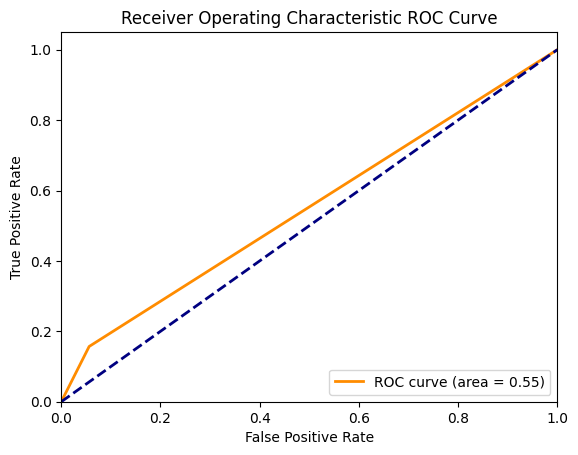

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Convert labels to one-hot encoding
y_one_hot = label_binarize(y_test, classes=np.unique(y))

# Compute probabilities for each class
y_prob = model2.predict_proba(X_test)

# Compute micro-averaged ROC curve and ROC AUC score
fpr, tpr, _ = roc_curve(y_one_hot.ravel(), y_prob.ravel())
roc_auc = roc_auc_score(y_one_hot, y_prob, average='micro')

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic ROC Curve')
plt.legend(loc="lower right")
plt.show()


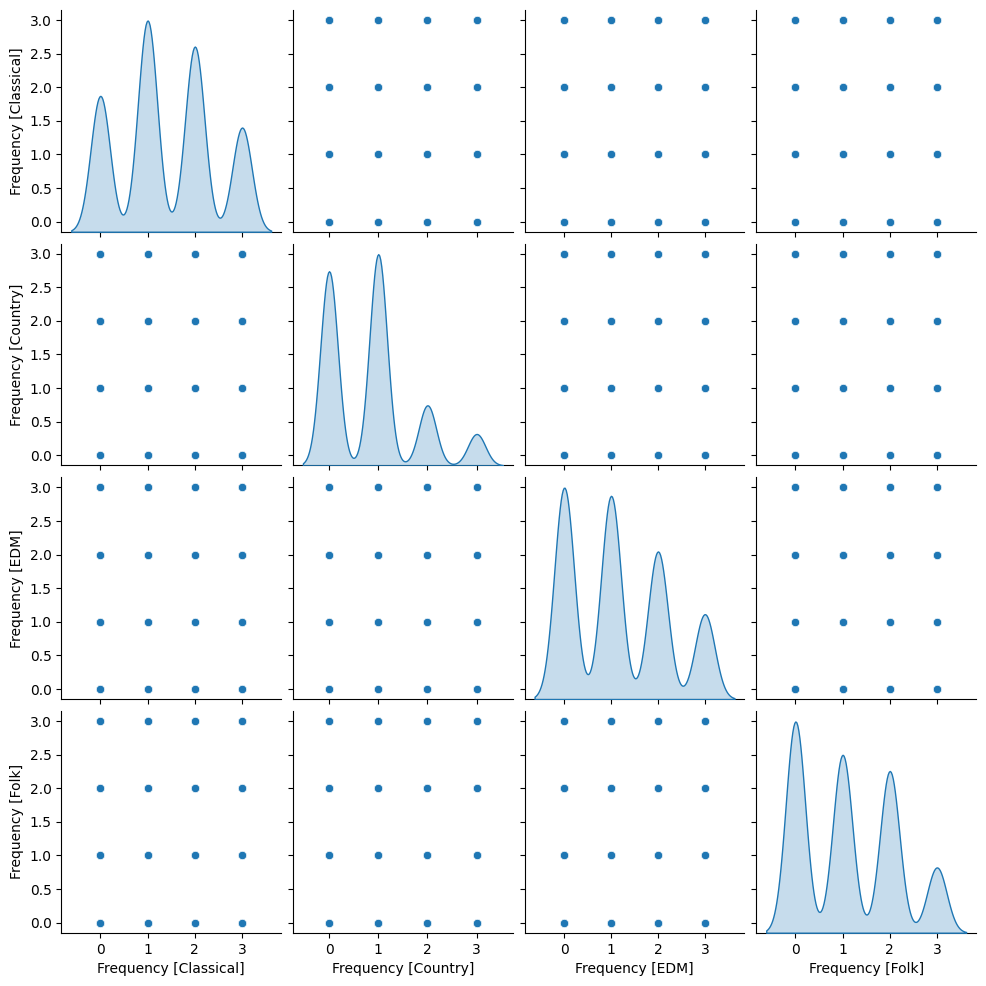

In [ ]:
# Visualization of data(X) before PCA, using pair plots to explore the relationships between different features

sns.pairplot(X.iloc[:, :4], diag_kind='kde')

Part3: Building a model on reduced data using PCA technique for Dimensionality Reduction. 

**PCA (Principal Component Analysis) for Dimensionality Reduction**

In [ ]:
# PCA with above code

# Define the input features and target variable
X = df[['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 
        'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 
        'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 
        'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
y = df['Fav genre']

# Reduce the dimensionality of the input features using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train the model
model3 = DecisionTreeClassifier()
model3.fit(X_pca, y)

# Define the test data
test_data = [X_pca[5]]

# Make the prediction
prediction = model3.predict(test_data)
predicted_label = prediction[0]  # Extract the predicted label from the array

# Get the row index in the original dataframe for the predicted label and music effects
row_index = df.loc[(df['Fav genre'] == predicted_label) & (df['Music effects'] == 2)].index[0]

# Get the recommended songs based on the predicted genre and music effects
recommended_songs = df.loc[row_index, ['song1', 'song2', 'song3']]

# Map the integer predicted_label to its corresponding categorical string value
predicted_genre = list(genre_map.keys())[list(genre_map.values()).index(predicted_label)]

# Convert the recommended songs to a string without the index label
recommended_songs_str = recommended_songs.to_string(index=False)

# Print the results
print('\nRecommended Genre of Music for you:', predicted_genre)
print('Recommended Songs for you:\n', recommended_songs_str)


Recommended Genre of Music for you: K pop
Recommended Songs for you:
 Boy With Luv by Artist BTS ft. Halsey
                     ON by Artist BTS
      Zimzalabim by Artist Red Velvet


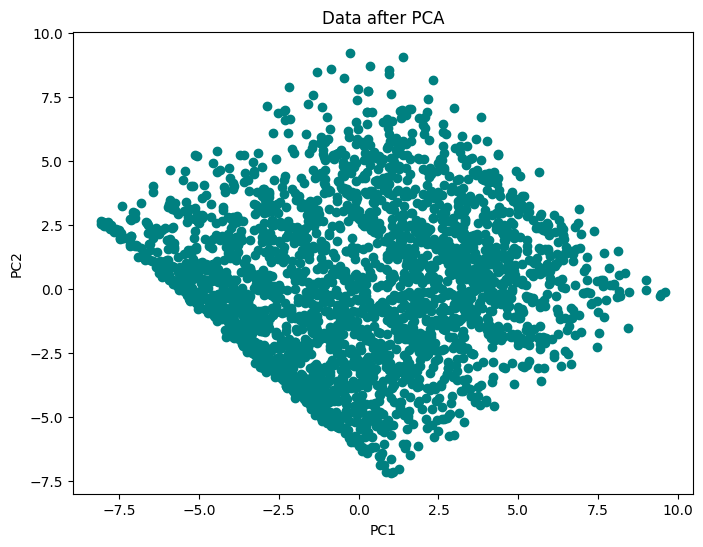

In [ ]:
# visualizing data(X) after PCA, using scatter plot to plot the first two principal components against each other. 
# Using PCA, original data of 20 features/dimensions are projected onto two components i.e. dimensions are reduced to 2. 

# Plotting the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color = 'teal')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data after PCA')
plt.show()


Part4: Building a model & Checking the prediction on user input Survey Data

In [ ]:
# with user input as survey

# Define the features
features = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 
            'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 
            'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 
            'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia', 'OCD']

# Initialize an empty list to store the user inputs
user_inputs = []

# Ask for user inputs for the features
print("\033[1mMusic & Mental Health Survey\033[0m")
print("Please fill following questionnaire based on the scale provided below:")
print("Music genre frequency scale - 0: Never, 1: Rarely, 2: Sometimes, 3: Very Frequently")
print("Mental Health experience scale - 0: I do not experience this, 10: I experience this regularly, constantly/or to an extreme")
print('\n')

for feature in features:
    if feature.startswith('Frequency'):
        while True:
            user_input = input(f"Please rate on a scale of 0-3, how much do you listen to the music of genre '{feature.split('[', 1)[1][:-1]}'? ")
            if user_input.isdigit() and int(user_input) in [0, 1, 2, 3]:
                break
            print("Invalid input. Please enter a value between 0 and 3.")
    else:
        while True:
            user_input = input(f"Please rate your feelings for {feature} on a scale of 0-10 : ")
            if user_input.isdigit() and int(user_input) in range(0, 11):
                break
            print("Invalid input. Please enter a value between 0 and 10.")
    user_inputs.append(float(user_input))

# Convert the user inputs to a dataframe
user_df = pd.DataFrame([user_inputs], columns=features)

# Create a decision tree classifier
model4 = DecisionTreeClassifier()

# Fit the model to the training data
model4.fit(X, y)

# Make the prediction
prediction = model4.predict(user_df)

# Get the predicted genre
predicted_label = prediction[0]

# Find the recommended songs
row_index = df.loc[(df['Fav genre'] == predicted_label) & (df['Music effects'] == 2)].index[0]
recommended_songs = df.loc[row_index, ['song1', 'song2', 'song3']]

# Convert the recommended songs to a string without the index label
recommended_songs_str = recommended_songs.to_string(index=False)

# Map the integer predicted_label to its corresponding categorical string value
predicted_genre = list(genre_map.keys())[list(genre_map.values()).index(predicted_label)]


# Print the results
print('\nRecommended Genre of Music for you:', predicted_genre)
print('Recommended Songs for you:\n', recommended_songs_str)
print("\nHope these songs make you feel better :) ")

Music & Mental Health Survey
Please fill following questionnaire based on the scale provided below:
Music genre frequency scale - 0: Never, 1: Rarely, 2: Sometimes, 3: Very Frequently
Mental Health experience scale - 0: I do not experience this, 10: I experience this regularly, constantly/or to an extreme


Please rate on a scale of 0-3, how much do you listen to the music of genre 'Classical'? 0
Please rate on a scale of 0-3, how much do you listen to the music of genre 'Country'? 1
Please rate on a scale of 0-3, how much do you listen to the music of genre 'EDM'? 6
Invalid input. Please enter a value between 0 and 3.
Please rate on a scale of 0-3, how much do you listen to the music of genre 'EDM'? 3
Please rate on a scale of 0-3, how much do you listen to the music of genre 'Folk'? 3
Please rate on a scale of 0-3, how much do you listen to the music of genre 'Gospel'? 2
Please rate on a scale of 0-3, how much do you listen to the music of genre 'Hip hop'? 2
Please rate on a scale of

## **Extreme Gradient Boosting XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score

# Define X and y
X = df[['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 
        'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 
         'Frequency [Rock]', 'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia', 'OCD']].values
y = df['Fav genre'].values

# Define the number of classes in the dataset
num_classes = len(set(y))

# Create an XGBoost model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the model
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculating F1 score and recall
f1 = f1_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)

Accuracy: 0.21350364963503649
F1 Score: 0.11512291016300176
Recall: 0.1314432034544454


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score

# Define X and y
X = df[['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 
        'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 
         'Frequency [Rock]', 'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia', 'OCD']].values
y = df['Fav genre'].values

# Define the number of classes in the dataset
num_classes = len(set(y))

# Create an XGBoost model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train the model
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculating F1 score and recall
f1 = f1_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)

Accuracy: 0.20584652862362973
F1 Score: 0.11512291016300176
Recall: 0.1314432034544454


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create the XGBoost classifier object
xgb_classifier = xgb.XGBClassifier()

# Define the hyperparameters to be tuned
params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 500, 1000]
}

# Perform grid search cross-validation
cv = 5
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=params, cv=cv, scoring='accuracy', n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))